# Homework #1- Single LIF Neuron
[Instructions](http://faculty.fiu.edu/~fasoto/courses/COMPNEURO/HW1-LIF.pdf)

In [1]:
%matplotlib inline
import numpy as np
import brian2 as br
import pylab as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("bright", 10))

In [2]:
# Start scope for brian2 simulation
br.start_scope()

In [3]:
# Define parameters of the LIF model
R = 100 * br.Mohm  # membrane resistance
tau = 10 * br.ms  # membrane time constant
thr = -50 * br.mV  # spike threshold
u_rest = -65 * br.mV  # resting potential
u_r = -70 * br.mV  # reset potential

# Define equation for the LIF model
eqs = '''
du/dt = ( -(u - u_rest) + R*I ) / tau : volt
I = input_current(t) : amp
'''

In [4]:
# Create stimulation timeseries
# I = 200pA, between 100 ms and 800 ms
tmp = np.zeros((1000,))
tmp[99:800] = 200

input_current = br.TimedArray(tmp*br.pamp, dt=1*br.ms)

In [5]:
LIF = br.NeuronGroup(N=1, model=eqs, method="linear", threshold='u>thr', reset='u=u_r')
LIF.u = u_rest
rec = br.StateMonitor(LIF, 'u', record=True)
br.run(1*br.second)

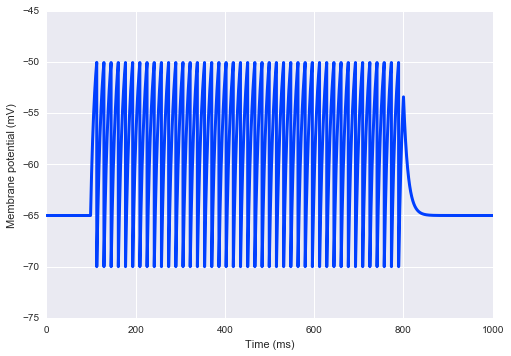

In [6]:
fig, ax = plt.subplots()
ax.plot(rec.t/br.ms, rec.u[0]*1000, label="State", lw=3.)
ax.set_ylim((-75, -45))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
plt.show(fig)

Stuff to say

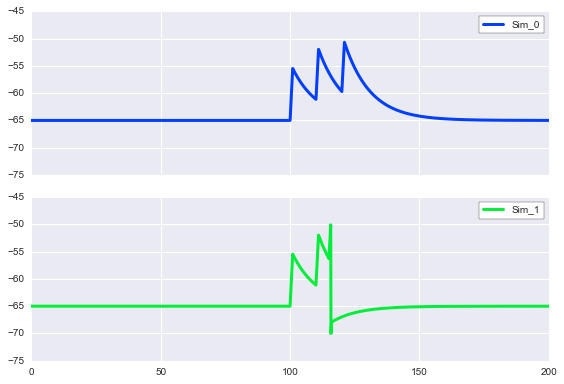

In [20]:
# Run two simulations
fig, axes = plt.subplots(2, sharex=True, sharey=True)
sim_times = np.array([[100, 110, 120],
                      [100, 110, 115]])

for i in range(sim_times.shape[0]):
    br.start_scope()
    tmp = np.zeros((1000,))
    tmp[sim_times[i, :]] = 1000

    input_current = br.TimedArray(tmp*br.pamp, dt=1*br.ms)
    
    LIF = br.NeuronGroup(N=1, model=eqs, method="linear", threshold='u>thr', reset='u=u_r')
    LIF.u = u_rest
    rec = br.StateMonitor(LIF, 'u', record=True)
    br.run(1*br.second)
    
    axes[i].plot(rec.t/br.ms, rec.u[0]*1000,
                 color=sns.color_palette("bright", 10)[i],
                 label="Sim_{0}".format(i),
                 lw=3.)
    legend = axes[i].legend(frameon=True)
    frame = legend.get_frame()
    frame.set_facecolor("white")
    frame.set_edgecolor("black")

axes[0].set_ylim((-75, -45))
axes[0].set_xlim((0, 200))

fig.tight_layout()
plt.show(fig)

Talk some more.